In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

Using TensorFlow backend.
C:\Users\uSer\AnacondaMy\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\uSer\AnacondaMy\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\uSer\AnacondaMy\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\uSer\AnacondaMy\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [3]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

In [4]:
from keras.optimizers import Adam

In [5]:
import matplotlib.pyplot as plt

In [6]:
from keras.layers import Conv2D, BatchNormalization, Dropout, LeakyReLU, Activation

In [7]:
import pickle as pic

In [8]:
file = open('Serialised_cifar10_recogniser.pkl','rb')
new_model = pic.load(file)
file.close()

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
NUM_CLASSES = 10
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [10]:
new_model.evaluate(x_test, y_test, batch_size = 1000)

10000/10000 [==============================] - 22s 2ms/step


[0.8287146925926209, 0.7263000011444092]

In [17]:
new_x_test = x_test[500:1000]
new_y_test = y_test[500:1000]

In [18]:
add_train_x = x_test[:500]
add_train_y = y_test[:500]

In [19]:
new_model.fit(add_train_x
, add_train_y
, batch_size = 100
, epochs = 10
, shuffle = True
)

Epoch 1/10
500/500 [==============================] - 8s 15ms/step - loss: 0.8674 - accuracy: 0.7080
Epoch 2/10
500/500 [==============================] - 4s 9ms/step - loss: 0.6985 - accuracy: 0.7500
Epoch 3/10
500/500 [==============================] - 4s 8ms/step - loss: 0.5503 - accuracy: 0.7880
Epoch 4/10
500/500 [==============================] - 4s 7ms/step - loss: 0.4189 - accuracy: 0.8560
Epoch 5/10
500/500 [==============================] - 4s 8ms/step - loss: 0.3272 - accuracy: 0.9120
Epoch 6/10
500/500 [==============================] - 4s 7ms/step - loss: 0.2536 - accuracy: 0.9440
Epoch 7/10
500/500 [==============================] - 4s 7ms/step - loss: 0.2199 - accuracy: 0.9640
Epoch 8/10
500/500 [==============================] - 4s 7ms/step - loss: 0.1776 - accuracy: 0.9780
Epoch 9/10
500/500 [==============================] - 3s 7ms/step - loss: 0.1624 - accuracy: 0.9740
Epoch 10/10
500/500 [==============================] - 4s 7ms/step - loss: 0.1261 - accuracy: 0.986

In [20]:
new_model.evaluate(new_x_test, new_y_test, batch_size = 500)

500/500 [==============================] - 1s 3ms/step


[0.9052562117576599, 0.7080000042915344]

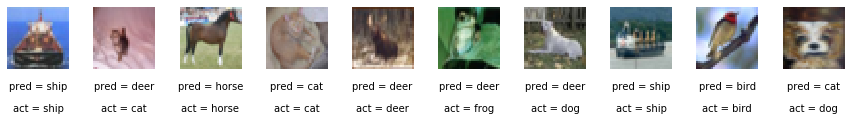

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
'frog', 'horse', 'ship', 'truck'])

preds = new_model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)